# Prosta Mova V3 Dataset Inspection
## Visual verification of polygon-masked line extractions

**Purpose**: Verify that polygon-based extraction produces tight crops without duplication

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import random
import os

# Set random seed for reproducibility
random.seed(42)

## 1. Load Datasets and Check for Duplicates

In [3]:
# Load train and val CSVs
train_csv = 'data/pylaia_prosta_mova_v3_train/train.csv'
val_csv = 'data/pylaia_prosta_mova_v3_val/train.csv'

# Read CSVs
train_df = pd.read_csv(train_csv, names=['image_path', 'text', 'page', 'width', 'height'])
val_df = pd.read_csv(val_csv, names=['image_path', 'text', 'page', 'width', 'height'])

print(f"Training lines: {len(train_df)}")
print(f"Validation lines: {len(val_df)}")
print(f"Total: {len(train_df) + len(val_df)}")

# Check for duplicates within each set
train_dupes = train_df[train_df.duplicated(subset=['image_path'], keep=False)]
val_dupes = val_df[val_df.duplicated(subset=['image_path'], keep=False)]

print(f"\nDuplicates within training: {len(train_dupes)}")
print(f"Duplicates within validation: {len(val_dupes)}")

# Check for overlap between train and val
train_images = set(train_df['image_path'])
val_images = set(val_df['image_path'])
overlap = train_images.intersection(val_images)

print(f"\nOverlap between train/val: {len(overlap)} images")
if len(overlap) > 0:
    print("WARNING: Train/val sets overlap!")
    print(f"Examples: {list(overlap)[:5]}")

Training lines: 51067
Validation lines: 2468
Total: 53535

Duplicates within training: 0
Duplicates within validation: 0

Overlap between train/val: 0 images


## 2. Statistics Comparison

In [4]:
print("Training Set Statistics:")
print(f"  Avg width: {train_df['width'].mean():.1f}px")
print(f"  Avg height: {train_df['height'].mean():.1f}px")
print(f"  Height range: {train_df['height'].min():.0f} - {train_df['height'].max():.0f}px")

print("\nValidation Set Statistics:")
print(f"  Avg width: {val_df['width'].mean():.1f}px")
print(f"  Avg height: {val_df['height'].mean():.1f}px")
print(f"  Height range: {val_df['height'].min():.0f} - {val_df['height'].max():.0f}px")

# Compare with V2 (bounding box)
print("\n=== Comparison with V2 (Bounding Box) ===")
print("V2 avg height: 67.2px (from dataset_info.json)")
print(f"V3 avg height: {(train_df['height'].mean() + val_df['height'].mean()) / 2:.1f}px")
print(f"Difference: {((train_df['height'].mean() + val_df['height'].mean()) / 2) - 67.2:.1f}px")

Training Set Statistics:
  Avg width: nanpx
  Avg height: nanpx
  Height range: nan - nanpx

Validation Set Statistics:
  Avg width: nanpx
  Avg height: nanpx
  Height range: nan - nanpx

=== Comparison with V2 (Bounding Box) ===
V2 avg height: 67.2px (from dataset_info.json)
V3 avg height: nanpx
Difference: nanpx


## 3. Visual Inspection: 20 Random Training Samples

/tmp/ipykernel_1490825/2115882264.py:20: UserWarning: Glyph 42623 (\N{CYRILLIC PAYEROK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1490825/2115882264.py:20: UserWarning: Glyph 42571 (\N{CYRILLIC SMALL LETTER MONOGRAPH UK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1490825/2115882264.py:20: UserWarning: Glyph 42561 (\N{CYRILLIC SMALL LETTER ZEMLYA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1490825/2115882264.py:20: UserWarning: Glyph 11752 (\N{COMBINING CYRILLIC LETTER EM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1490825/2115882264.py:20: UserWarning: Glyph 11758 (\N{COMBINING CYRILLIC LETTER TE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1490825/2115882264.py:20: UserWarning: Glyph 11757 (\N{COMBINING CYRILLIC LETTER ES}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1490825/2115882264.py:20: UserWarning: Glyph 42585 (\N{

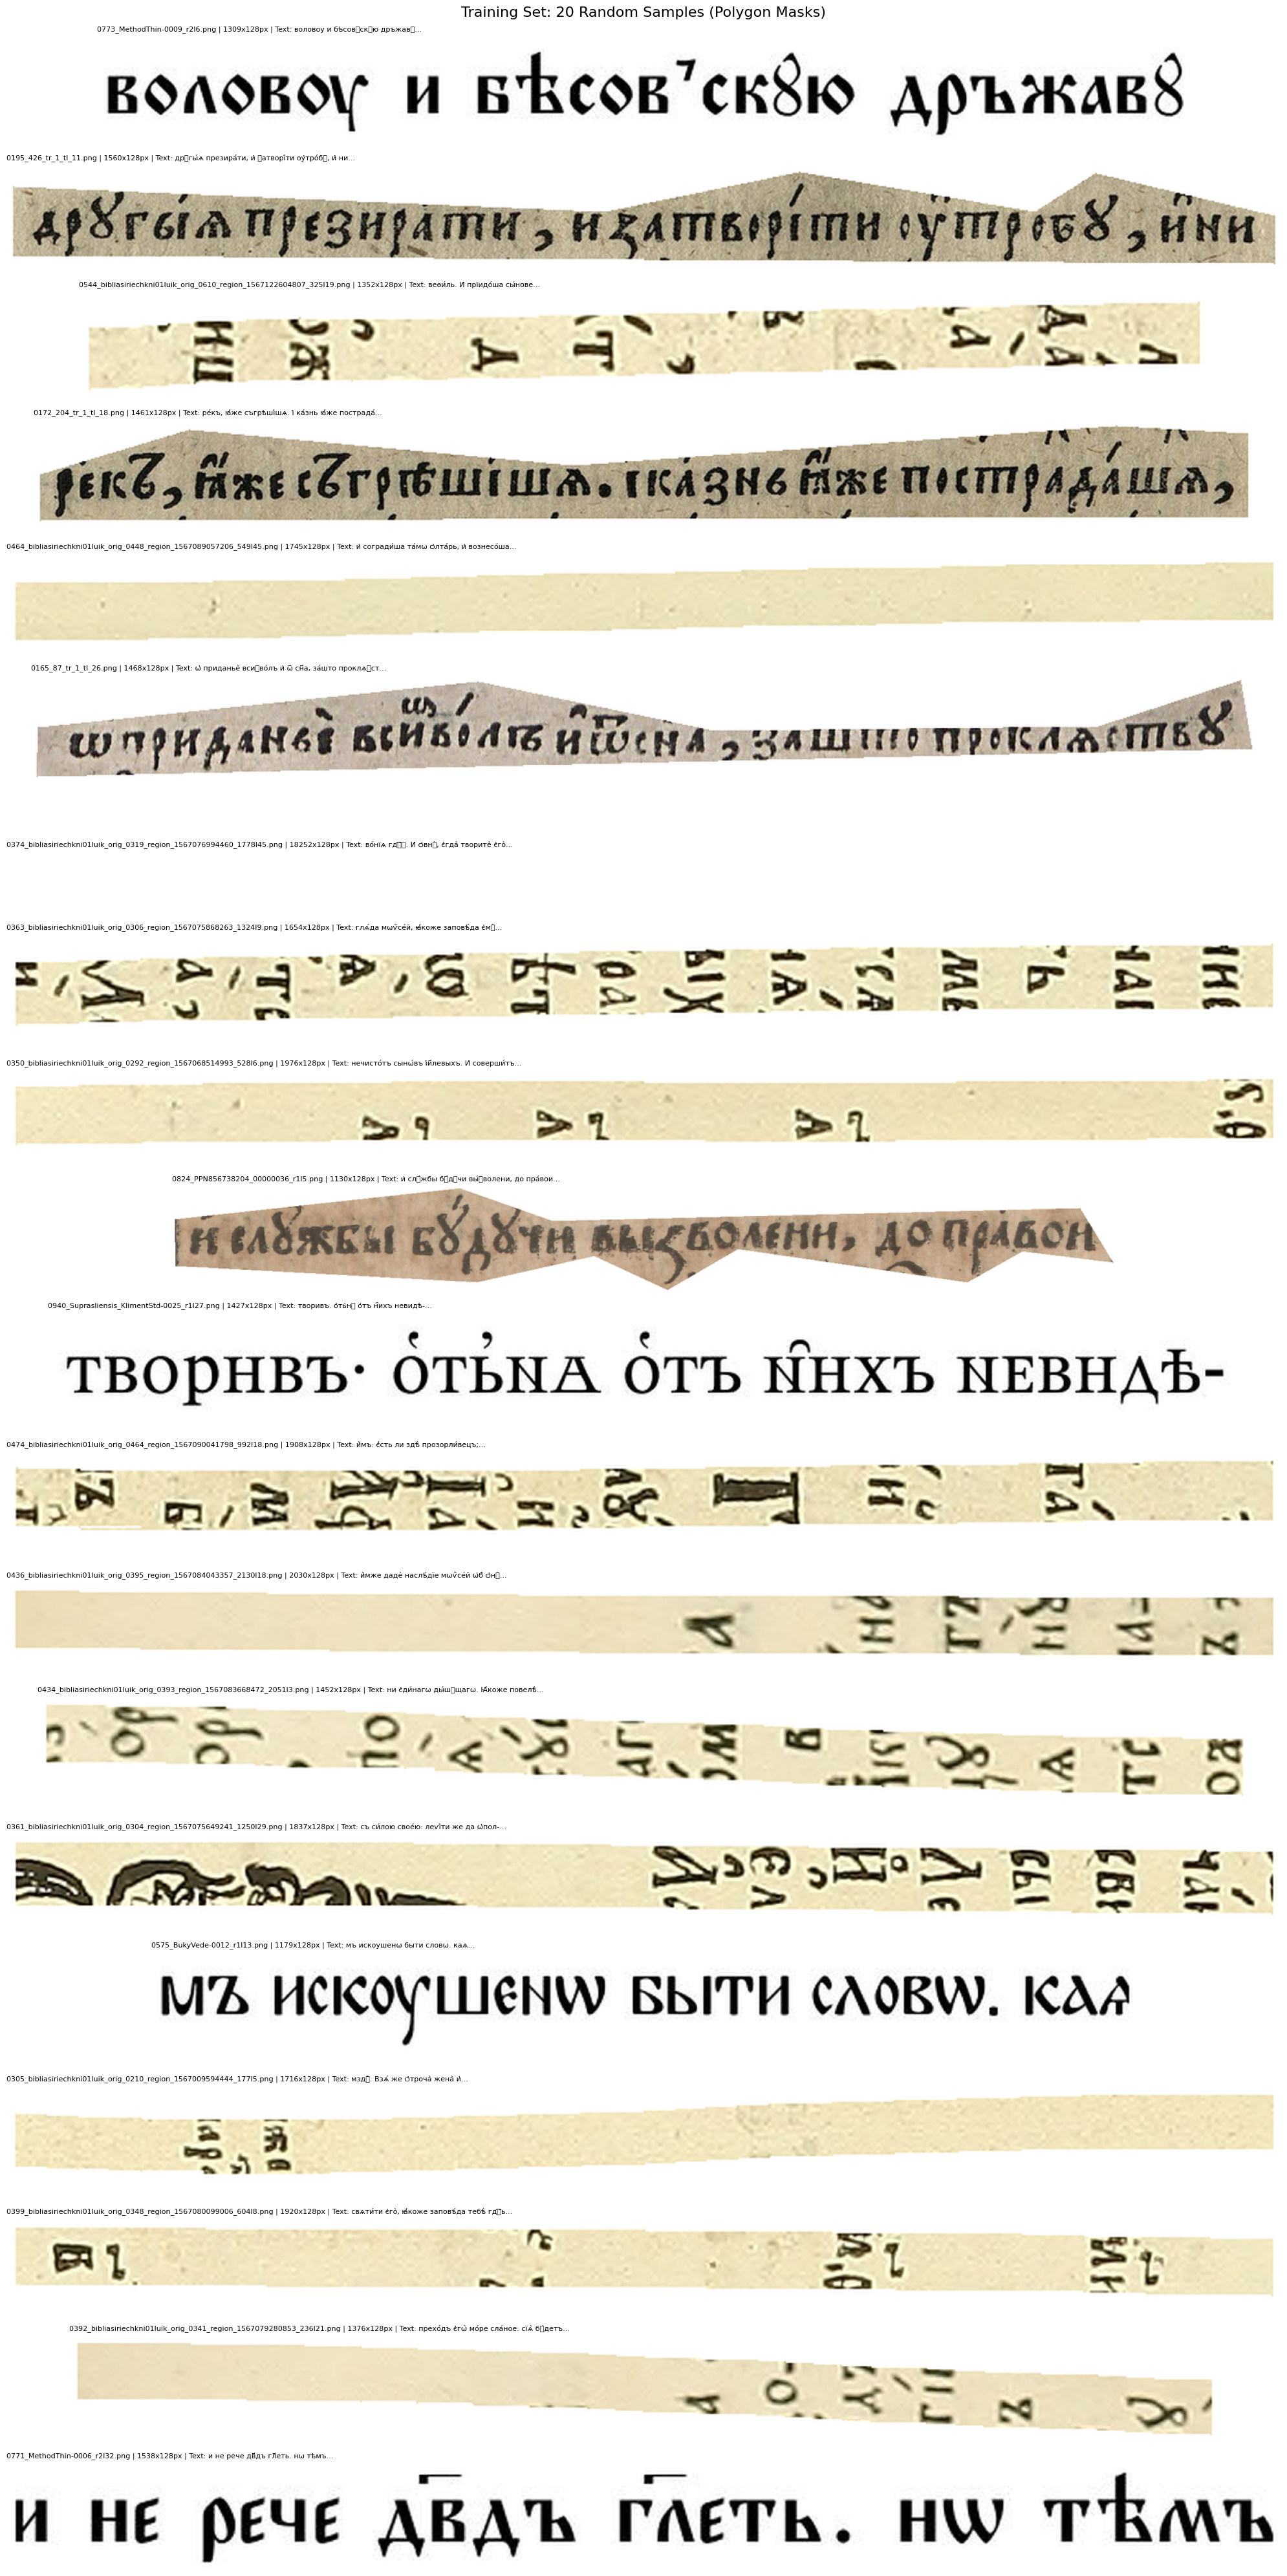

In [5]:
# Sample 20 random training images
train_samples = train_df.sample(n=20, random_state=42)

fig, axes = plt.subplots(20, 1, figsize=(20, 40))
fig.suptitle('Training Set: 20 Random Samples (Polygon Masks)', fontsize=16, y=0.995)

for idx, (ax, (_, row)) in enumerate(zip(axes, train_samples.iterrows())):
    img_path = os.path.join('data/pylaia_prosta_mova_v3_train', row['image_path'])
    
    try:
        img = Image.open(img_path)
        ax.imshow(img, cmap='gray')
        ax.set_title(f"{row['image_path'].split('/')[-1]} | {img.size[0]}x{img.size[1]}px | Text: {row['text'][:50]}...", 
                     fontsize=8, loc='left')
        ax.axis('off')
    except Exception as e:
        ax.text(0.5, 0.5, f"Error loading: {str(e)}", ha='center', va='center')
        ax.axis('off')

plt.tight_layout()
plt.savefig('prosta_mova_v3_train_samples.png', dpi=150, bbox_inches='tight')
plt.show()

## 4. Visual Inspection: 10 Random Validation Samples

In [ ]:
# Sample 10 random validation images
val_samples = val_df.sample(n=10, random_state=42)

fig, axes = plt.subplots(10, 1, figsize=(20, 20))
fig.suptitle('Validation Set: 10 Random Samples (Polygon Masks)', fontsize=16, y=0.995)

for idx, (ax, (_, row)) in enumerate(zip(axes, val_samples.iterrows())):
    img_path = os.path.join('data/pylaia_prosta_mova_v3_val', row['image_path'])
    
    try:
        img = Image.open(img_path)
        ax.imshow(img, cmap='gray')
        ax.set_title(f"{row['image_path'].split('/')[-1]} | {img.size[0]}x{img.size[1]}px | Text: {row['text'][:50]}...", 
                     fontsize=8, loc='left')
        ax.axis('off')
    except Exception as e:
        ax.text(0.5, 0.5, f"Error loading: {str(e)}", ha='center', va='center')
        ax.axis('off')

plt.tight_layout()
plt.savefig('prosta_mova_v3_val_samples.png', dpi=150, bbox_inches='tight')
plt.show()

## 5. Height Distribution Analysis

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Training height distribution
axes[0].hist(train_df['height'], bins=50, edgecolor='black', alpha=0.7)
axes[0].axvline(train_df['height'].mean(), color='red', linestyle='--', label=f'Mean: {train_df["height"].mean():.1f}px')
axes[0].axvline(67.2, color='blue', linestyle='--', label='V2 Bbox: 67.2px')
axes[0].set_xlabel('Original Height (before resize)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Training Set: Height Distribution')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Validation height distribution
axes[1].hist(val_df['height'], bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1].axvline(val_df['height'].mean(), color='red', linestyle='--', label=f'Mean: {val_df["height"].mean():.1f}px')
axes[1].axvline(67.2, color='blue', linestyle='--', label='V2 Bbox: 67.2px')
axes[1].set_xlabel('Original Height (before resize)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Validation Set: Height Distribution')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('prosta_mova_v3_height_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

## 6. Investigation: Why is polygon height LARGER than bbox?

**Expected**: Polygon masks should create TIGHTER crops (smaller height)

**Observed**: Polygon height (80.7px) > Bbox height (67.2px)

**Hypothesis**: Polygon extraction might be including MORE whitespace, not less

In [ ]:
# Let's look at the tallest lines to understand what's happening
tallest_lines = train_df.nlargest(10, 'height')[['image_path', 'width', 'height', 'text']]
print("10 Tallest Lines (before resize to 128px):")
print(tallest_lines)

# And the shortest
shortest_lines = train_df.nsmallest(10, 'height')[['image_path', 'width', 'height', 'text']]
print("\n10 Shortest Lines (before resize to 128px):")
print(shortest_lines)